# EDA
---

In [1]:
import numpy as np
import pandas as pd
import neutron_stars as ns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from tqdm import tqdm 
from glob import iglob

In [2]:
plt.rc('font', size=25); plt.rc('axes', titlesize=25); plt.rc('axes', labelsize=25); plt.rc('xtick', labelsize=22); plt.rc('ytick', labelsize=22)

In [3]:
from IPython.core.pylabtools import figsize
figsize(30, 10)

In [16]:
all_files = [
    f for f in iglob('/baldig/physicstest/NeutronStarsData/res/*.npz')
    if "2Param" in f
]

### Load Data

In [17]:
details = np.zeros((0, 5))
spectra = np.zeros((0, 250))
coefficients = np.zeros((0, 2))

for file in tqdm(all_files):
    np_file = np.load(file)
    
    spectra = np.concatenate([
        spectra,
        np_file['spectra'][:, :250], 
    ])
    details = np.concatenate([
        details,
        np_file['details'], 
    ])
    coefficients = np.concatenate([
        coefficients,
        np_file['coefficients'], 
    ])

100%|██████████| 193/193 [00:36<00:00,  5.34it/s]


### Spectra

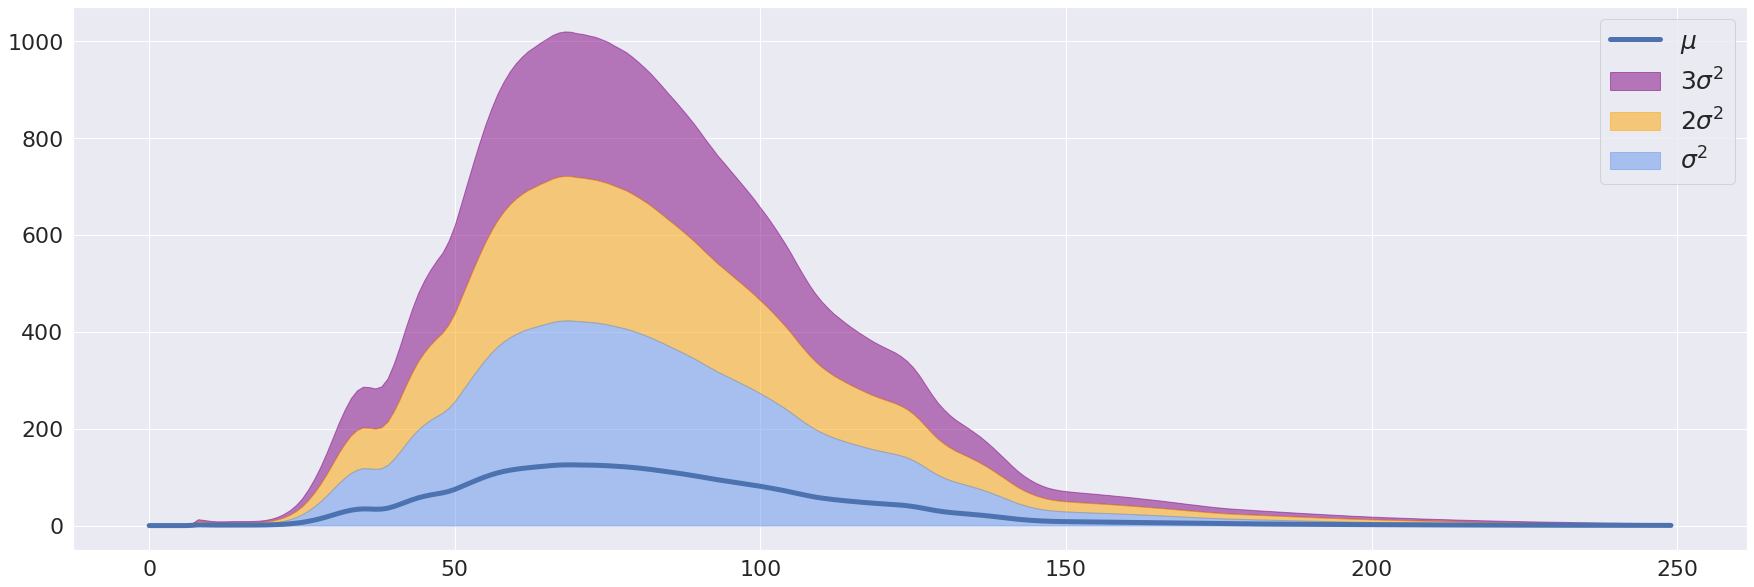

In [9]:
x = np.arange(250)
sigma = np.mean(spectra, 0) + np.std(spectra, 0)
sigma2 = np.mean(spectra, 0) + 2*np.std(spectra, 0)
sigma3 = np.mean(spectra, 0) + 3*np.std(spectra, 0)
lower = np.zeros(250)

plt.fill_between(x, sigma3, sigma2, alpha=.5, color='purple', label='$3\sigma^2$')
plt.fill_between(x, sigma2, sigma, alpha=.5, color='orange', label='$2\sigma^2$')
plt.fill_between(x, sigma, lower, alpha=.5, color='cornflowerblue', label=r'$\sigma^2$')
plt.plot(x, np.mean(spectra, 0), color='b', lw=5, label=r'$\mu$')

plt.legend(fontsize=25);

### Nuissance Parameters and Mass-Radius

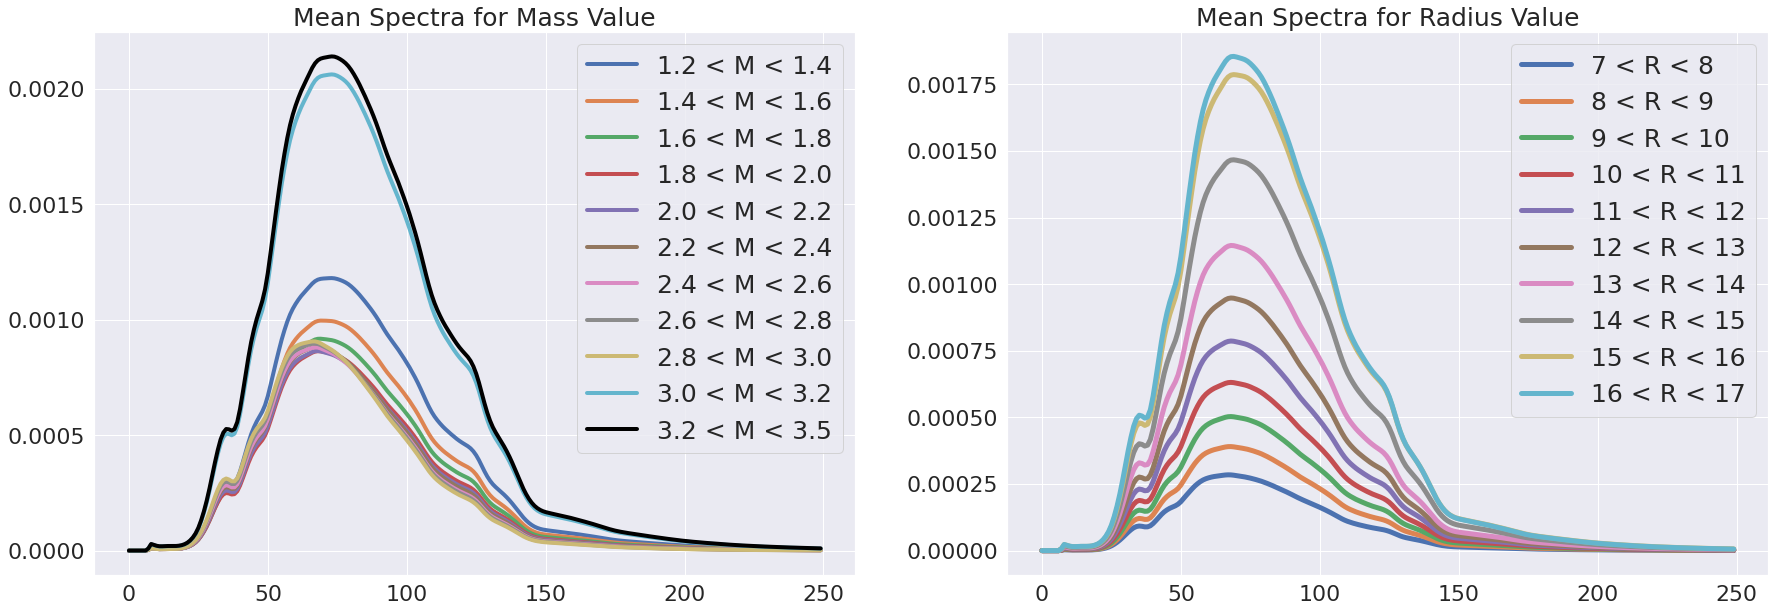

In [7]:
plt.subplot(1,2,1)
w = .2
start = 1.2; end = 3.5
delta = end - start
x = [start + w * i for i in range(int(delta/w)+1)]
for i in x[:-1]:
    mean = spectra[(details[:,0] < i + w) & (details[:,0] > i)].mean(0)
#     plt.plot(spectra[(details[:,0] < i + w) & (details[:,0] > i)].mean(0), label=f'{round(i,2)} < M < {round(i+w, 2)}', lw=4);
    
    if i == 3.2:
        plt.plot(mean, label=f'{round(i,2)} < M < {round(i+.3,2)}', lw=4, color='black');
    else:
        plt.plot(mean, label=f'{round(i,2)} < M < {round(i+w,2)}', lw=4);

plt.title('Mean Spectra for Mass Value')
plt.legend(fontsize=25);

plt.subplot(1,2,2)
w = 1
start = 7; end = 17
delta = end - start
x = [start + w * i for i in range(int(delta/w)+1)]
for i in x[:-1]:
#     std = spectra[(details[:,1] < i + w) & (details[:,1] > i)].std(0)
    mean = spectra[(details[:,1] < i + w) & (details[:,1] > i)].mean(0)
#     sigma = mean + .1 * std
#     plt.fill_between(range(250), sigma, mean, alpha=.5)
    plt.plot(mean, label=f'{i} < R < {i+w}', lw=5);

plt.title('Mean Spectra for Radius Value')
plt.legend(fontsize=25);

# To Do
1. Sliding window based on density 
2. Sliding window based on M/R ratio

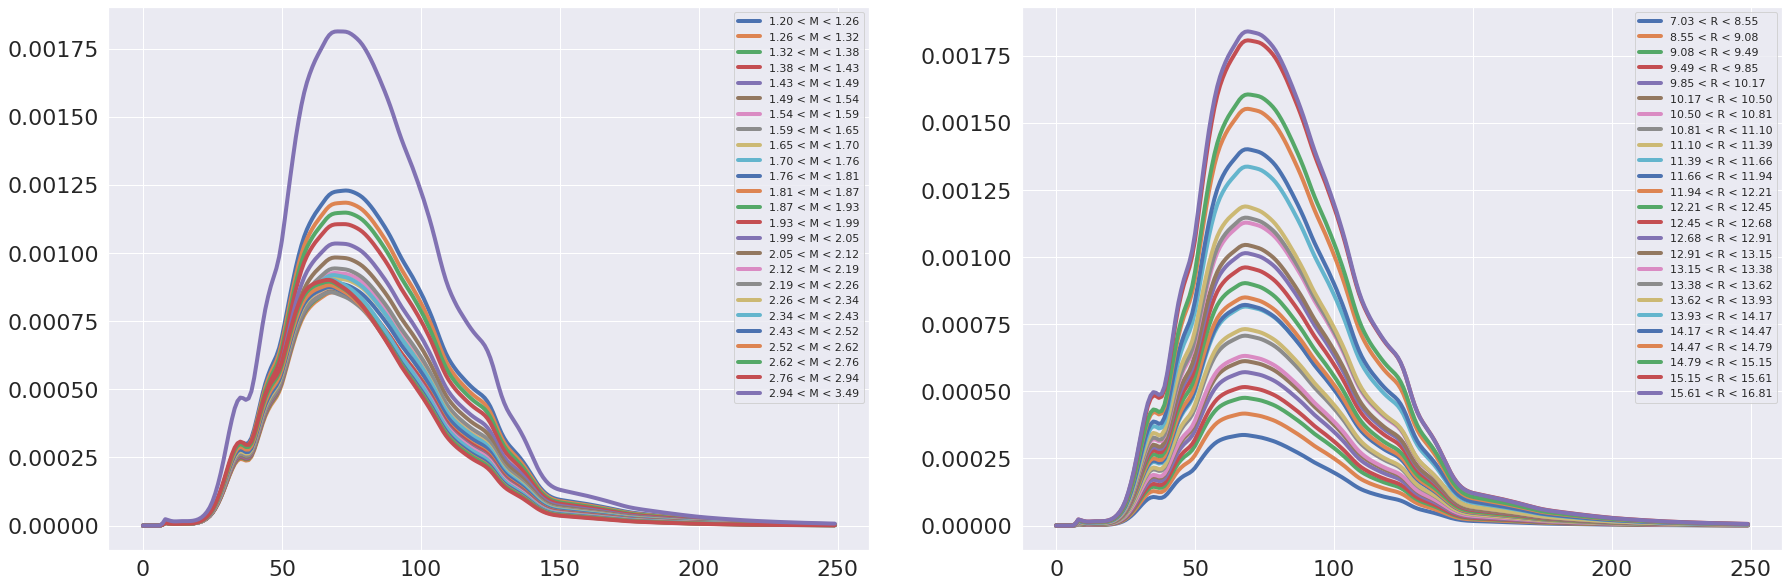

In [24]:
num_bands = 25
num_total = sorted_details[:,0].shape[0]
w = int(num_total / num_bands)


# MASS
idx = np.argsort(details[:, 0])
sorted_details = details[idx]
sorted_spectra = spectra[idx]

plt.subplot(1,2,1)
for s in range(0, num_total, w):
    mean = sorted_spectra[s:s+w].mean(0)
    
    start_mass = sorted_details[s, 0]
    end_mass = sorted_details[min(s+w, num_total-1), 0]
    
    plt.plot(mean, label=f'{start_mass:.2f} < M < {end_mass:.2f}', lw=4);
plt.legend()


# RADIUS
idx = np.argsort(details[:, 1])
sorted_details = details[idx]
sorted_spectra = spectra[idx]

plt.subplot(1,2,2)
for s in range(0, num_total, w):
    mean = sorted_spectra[s:s+w].mean(0)
    
    start_mass = sorted_details[s, 1]
    end_mass = sorted_details[min(s+w, num_total-1), 1]
    
    plt.plot(mean, label=f'{start_mass:.2f} < R < {end_mass:.2f}', lw=4);
plt.legend();

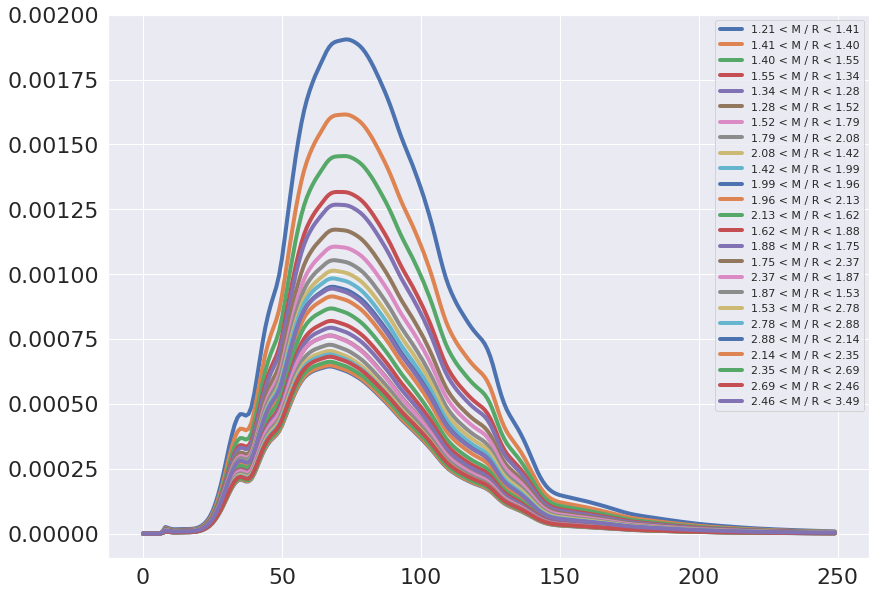

In [26]:
num_bands = 25
num_total = sorted_details[:,0].shape[0]
w = int(num_total / num_bands)


# MASS / RADIUS RATIO
idx = np.argsort(details[:, 0] / details[:, 1])
sorted_details = details[idx]
sorted_spectra = spectra[idx]

plt.subplot(1,2,1)
for s in range(0, num_total, w):
    mean = sorted_spectra[s:s+w].mean(0)
    
    start_mass = sorted_details[s, 0]
    end_mass = sorted_details[min(s+w, num_total-1), 0]
    
    plt.plot(mean, label=f'{start_mass:.2f} < M / R < {end_mass:.2f}', lw=4);
plt.legend();

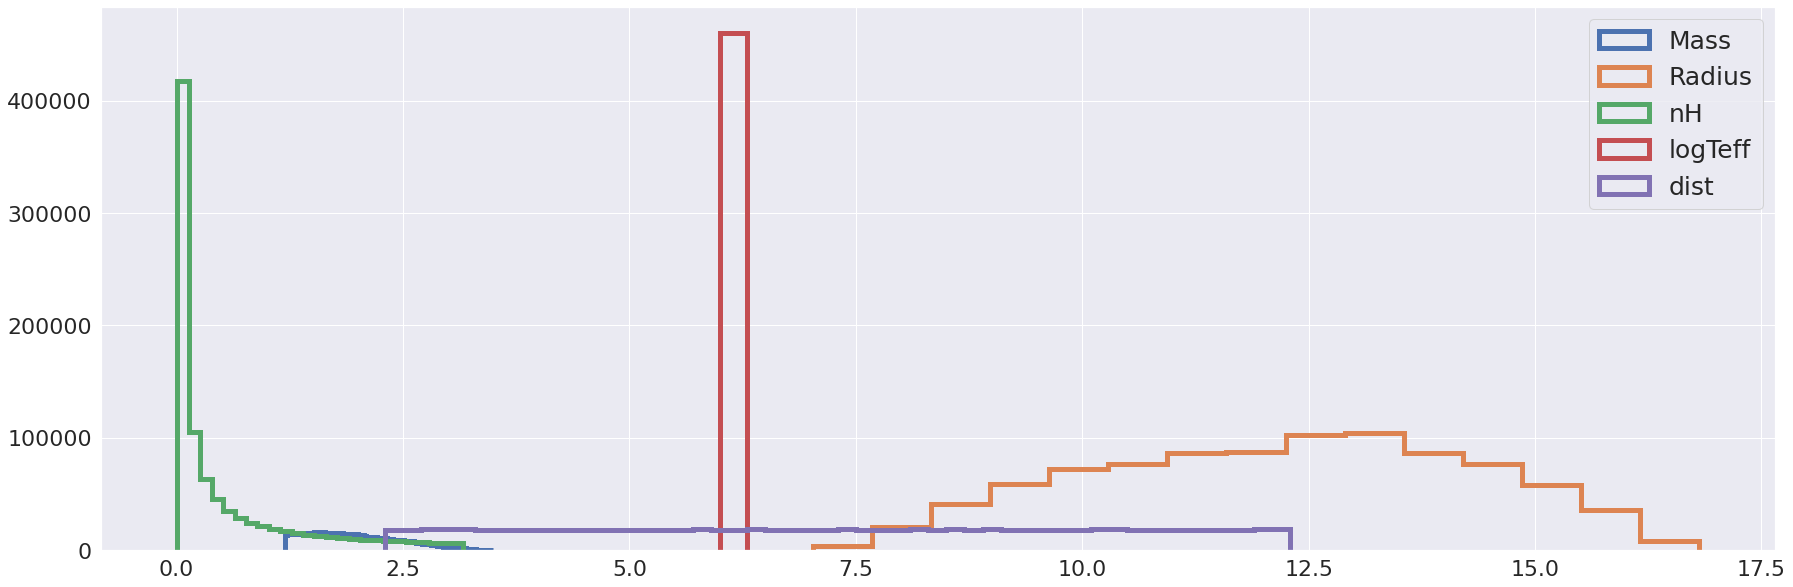

In [25]:
star = ['Mass', 'Radius', 'nH', 'logTeff', 'dist']
for i, bins in zip(range(5), [100, 15, 25, 2, 50]):
    plt.hist(details[:, i], bins=bins, histtype='step', lw=5, label=star[i], )
plt.legend(fontsize=25);

### Coefficients

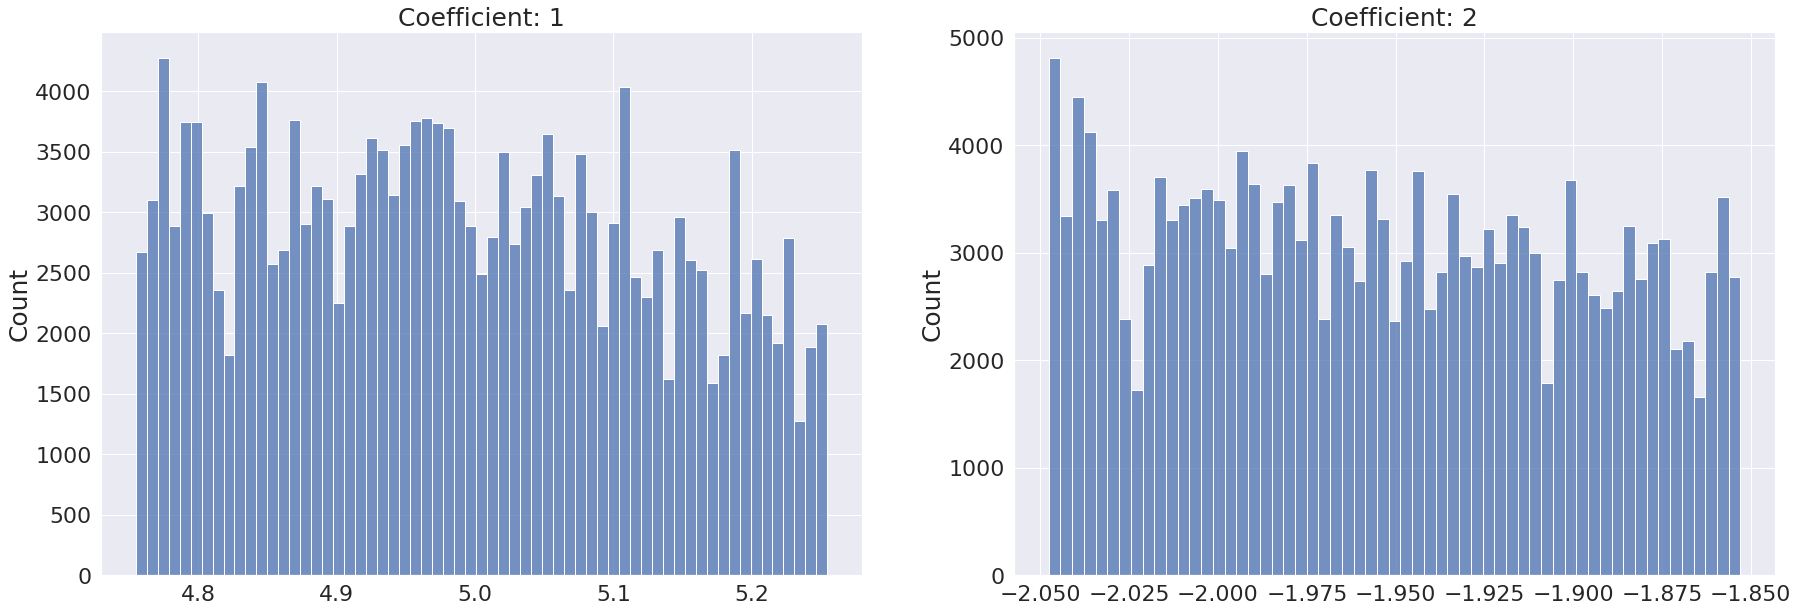

In [19]:
columns = ['C1', 'C2', ]
coef_df = pd.DataFrame(data=coefficients, columns=columns)
for i in range(len(columns)):
    plt.subplot(1, len(columns), i+1)
    ax = sns.histplot(data=coef_df[[f'C{i+1}']]); ax.get_legend().remove()
    plt.title(f'Coefficient: {i+1}', fontsize=25);
    
plt.savefig('../Figures/EDA/coefficients_hist.png')

In [20]:
coef_df.max()

C1    5.254797
C2   -1.852893
dtype: float64

In [21]:
coef_df.min()

C1    4.754617
C2   -2.047648
dtype: float64

In [14]:
coef_df.max()

C1    5.914221
C2   -4.136863
C3    1.592367
C4   -0.222410
dtype: float64

In [15]:
coef_df.min()

C1    5.351312
C2   -4.571429
C3    1.440902
C4   -0.245804
dtype: float64

### Mass-Radius Curves

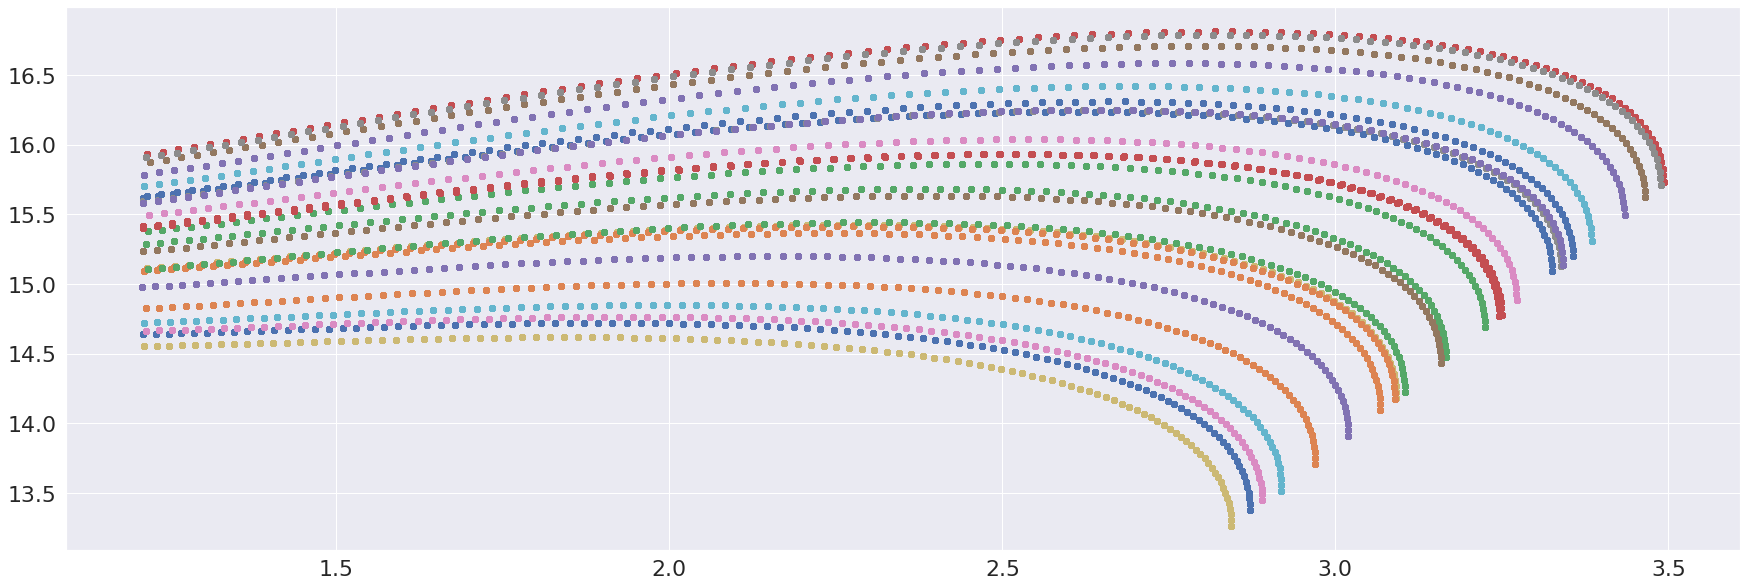

In [11]:
unique_coefficients = np.unique(coefficients, axis=0)
for i in range(25):
    idx = np.all(coefficients == unique_coefficients[i], axis=1)
    plt.scatter(details[idx, 0], details[idx, 1])

### Poisson Noise on Spectra

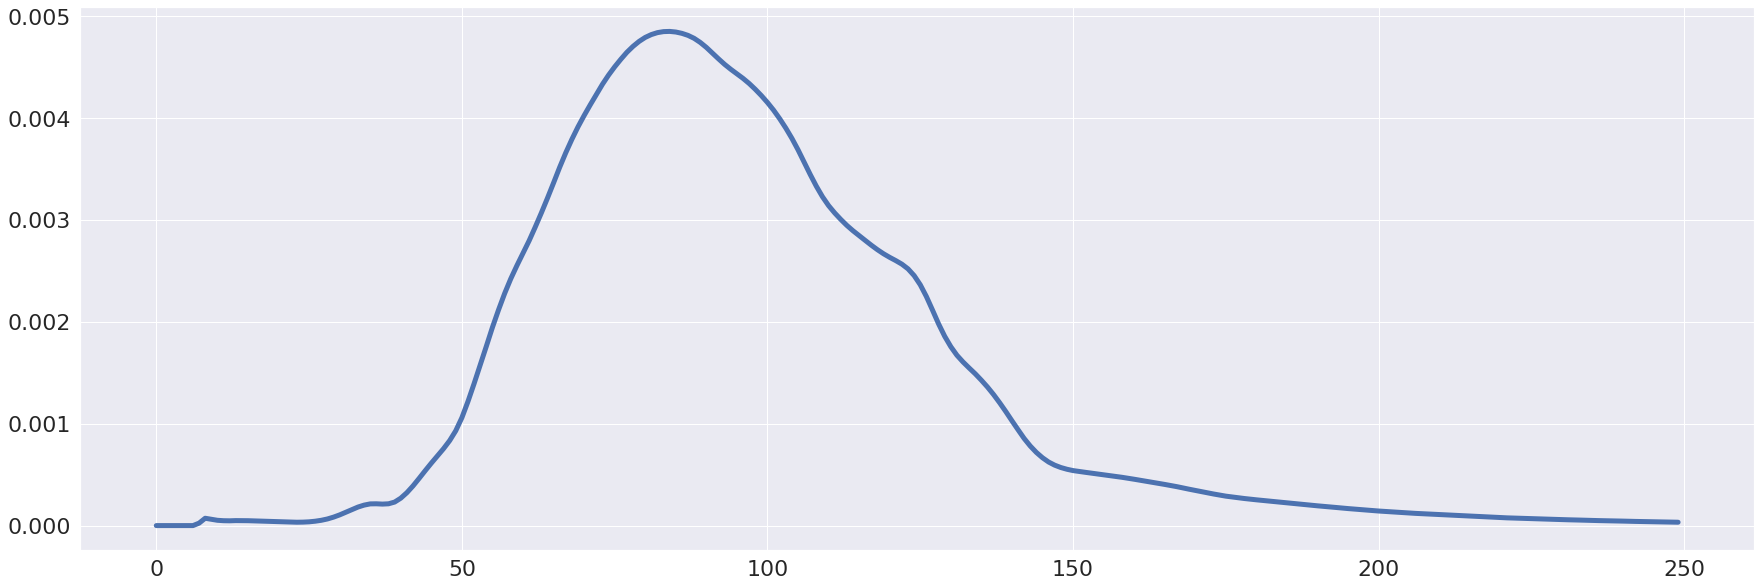

In [12]:
plt.plot(spectra[0], lw=5)
# plt.plot(np.random.poisson(spectra[0], size=(10, 250)).T);

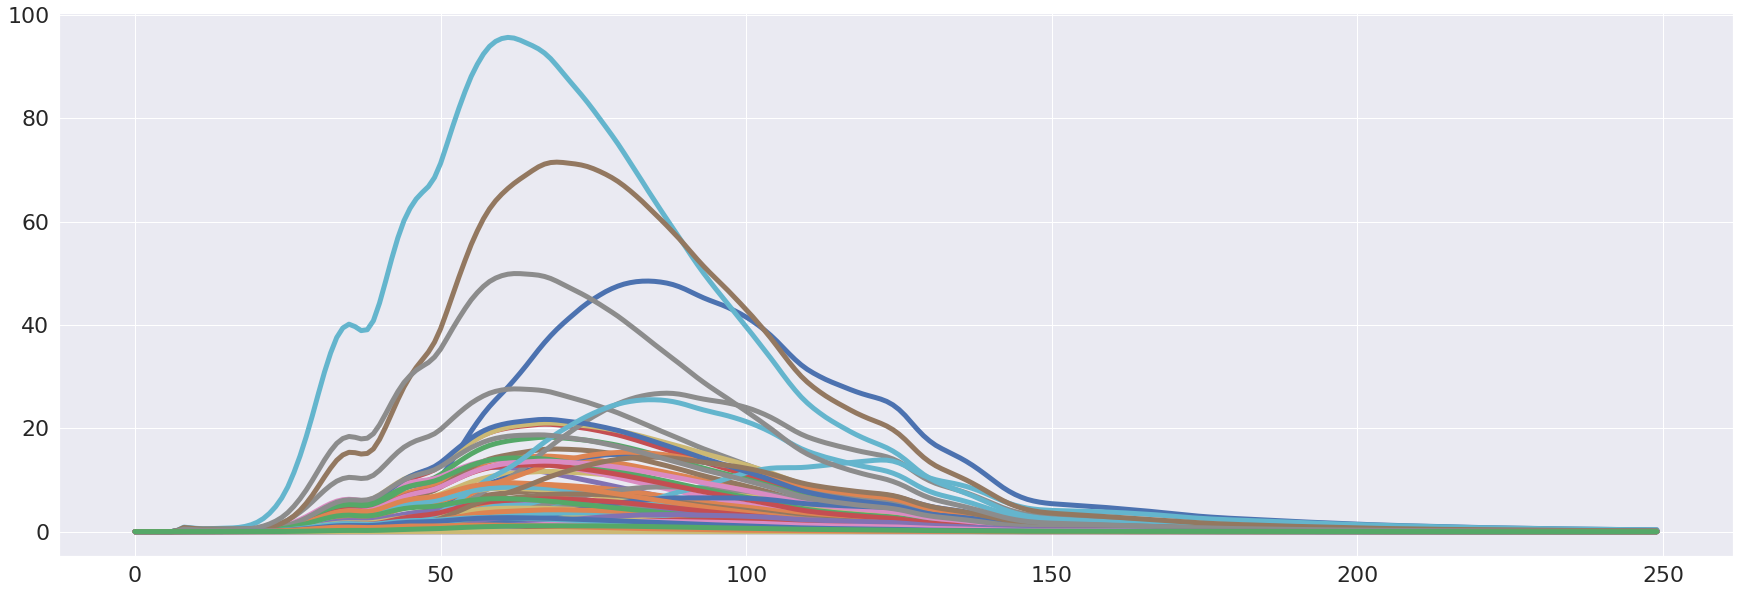

In [17]:
for i in range(0, spectra.shape[0], 10000):
    plt.plot(spectra[i] * 10000, lw=5)

### Coefficients Along Mass-Radius Curve

In [44]:
unique_coefficients = np.unique(coefficients, axis=0)

In [29]:
holder = np.empty((0, 7))
all_distances = []
for coeff in tqdm(unique_coefficients):
    idx = np.all(coefficients == coeff, axis=1)
    group = details[idx]
    
    distances = np.abs(group[:, 0] - 1.4999) # 1.2031629
    min_idx = np.argmin(distances)
    
    if np.min(distances) < 0.00001:
        holder = np.concatenate([
            holder, 
            np.hstack([group[min_idx], coeff]).reshape(1,7)
        ])

100%|██████████| 965/965 [00:18<00:00, 51.28it/s]


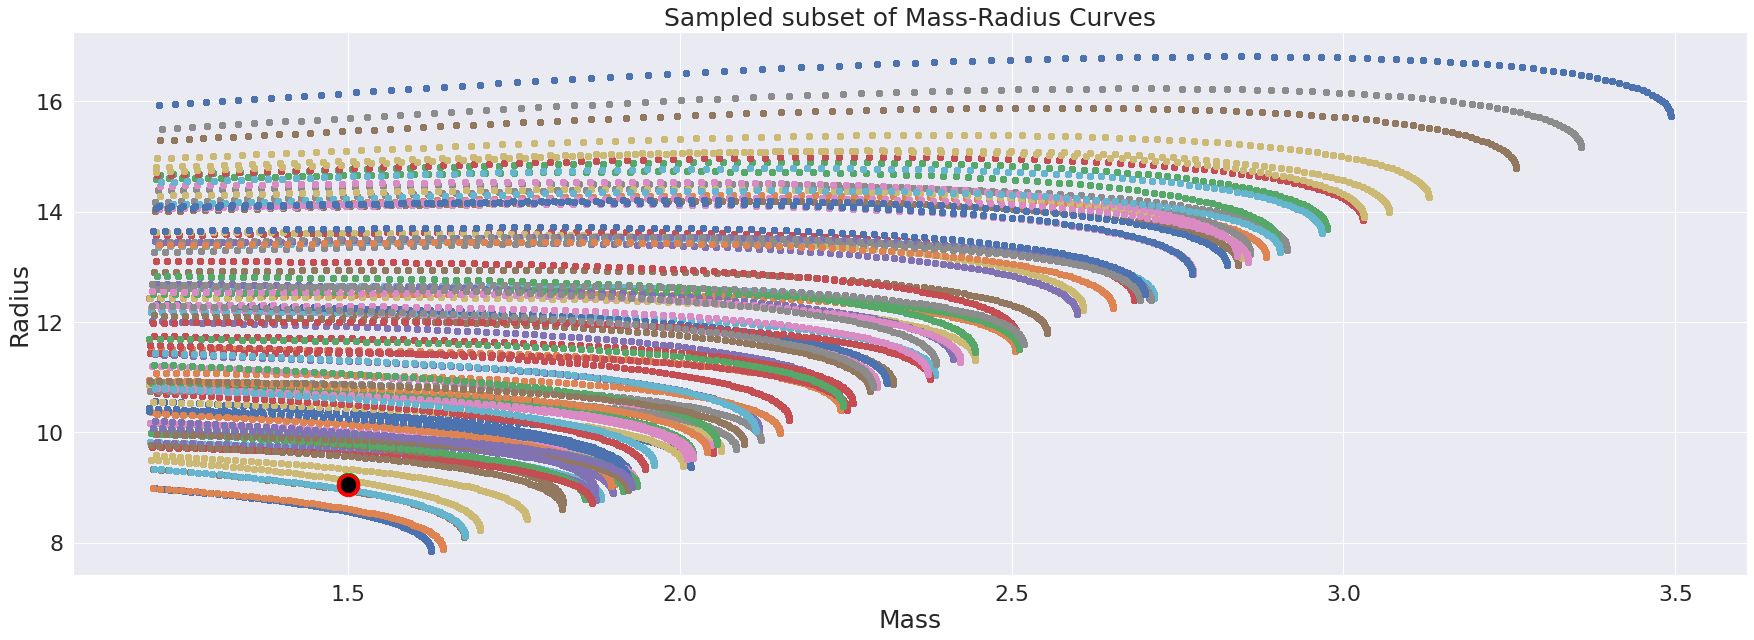

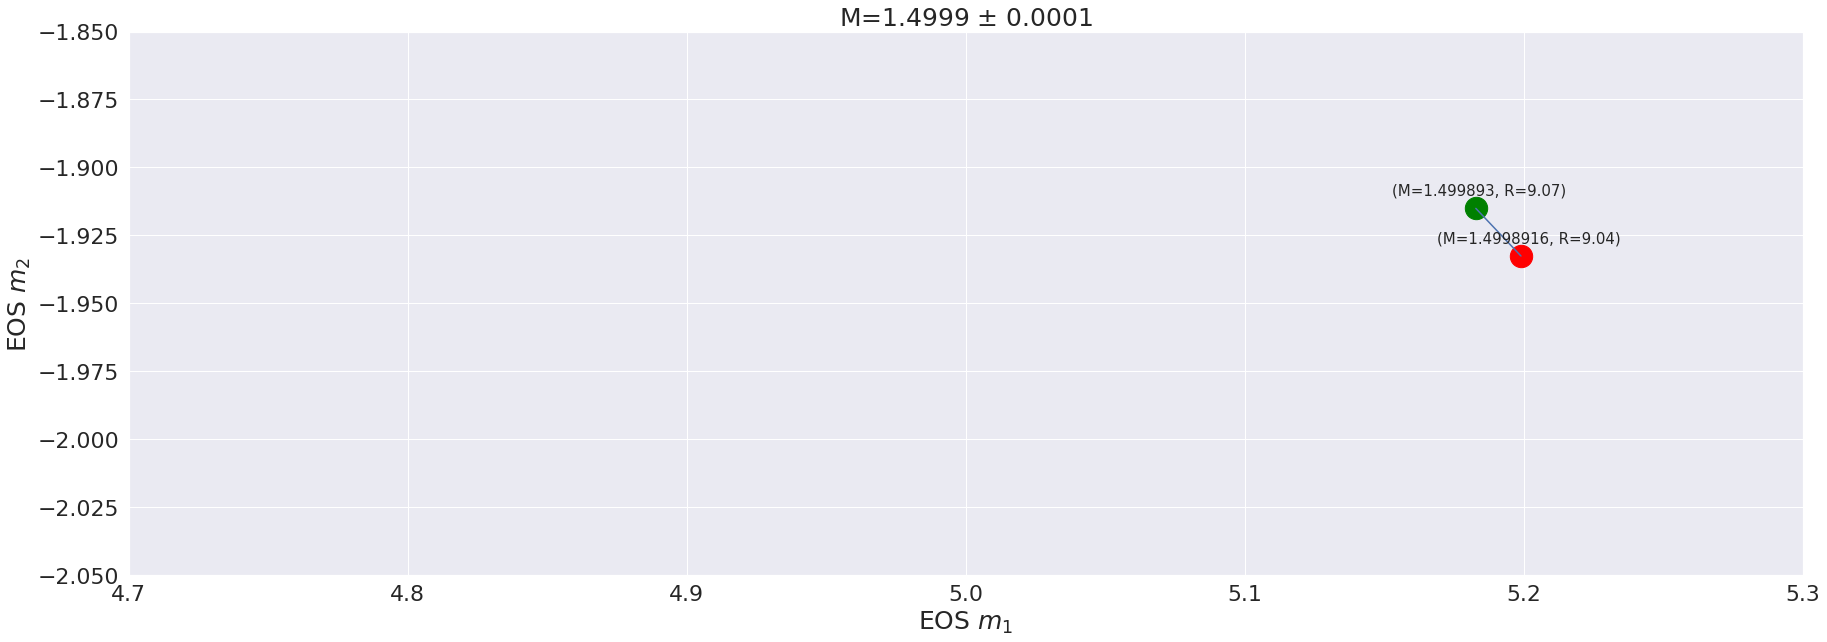

In [30]:
sorted_by_radius = holder[np.argsort(holder[:,1])[::-1]]

idx = np.arange(unique_coefficients.shape[0])
idx = np.random.choice(idx, 100)

for coeff in unique_coefficients[idx]:
    idx = np.all(coefficients == coeff, axis=1)
    group = details[idx]
    
    plt.scatter(group[:,0], group[:,1])

M = sorted_by_radius[:, 0]
R = sorted_by_radius[:, 1]
plt.scatter(M[0], R[0], color='green', s=500); plt.scatter(M[-1], R[-1], color='red', s=500);
plt.scatter(M, R, color='black', s=200)
plt.title('Sampled subset of Mass-Radius Curves'); plt.xlabel('Mass'); plt.ylabel('Radius'); plt.show()
        
    
x = sorted_by_radius[:, -2]
y = sorted_by_radius[:, -1]

for i in range(len(holder)):
    color = 'black'
    if i == 0: color = 'green'
    elif i == (len(holder) -1): color = 'red'
        
    plt.scatter(x[i], y[i], color=color, s=500)
    plt.text(x[i]-.03, y[i]+.005, f"(M={M[i].round(7)}, R={R[i].round(2)})", fontsize=15)
    
plt.plot(x, y); plt.ylim(-2.05, -1.85); plt.xlim(4.7, 5.3);
plt.xlabel(r'EOS $m_1$'); plt.ylabel(r'EOS $m_2$'); plt.title(r'M=1.4999 $\pm$ 0.0001');